## Основные виды задач машинного обучения:


- Задача регрессии — задача с вещественной целевой переменной, где основная цель предсказать значение близкое к фактическому в смысле некоторого функционала ошибки. Простой пример — предсказание цены дома по его параметрам.


- Задача классификации (в том числе многоклассовая и многоклассовая с пересекающимися классами) — задача, где целевая переменная принимает значение из некоторого фиксированного конечного множества значений (или несколько в случае пересекающихся классов). Например, задача тегирования видеороликов — многоклассовая классификация с пересекающимися классами.


- Задача кластеризации — задача, в которой выборка не имеет какой-то целевой переменной, а необходимо разделить объекты на группым по некоторым свойствам. На практике нередко сложно оценить качество при решении этой задачи. Пример — разделить пользователей сервиса на группы для дальнейшего исследования клиентов. 


- Задача поиска выбросов — задача, похожая на бинарную классификацию с преобладанием объектов одного класса с тем отличием, что объекты "редкого" класса могут быть не похожими между собой, а лишь отличаться от объектов основного класса. Кроме этого, на практике объектов-выбросов в выборке может и не быть. Например, задача поиска фальшивых монет. Если быть строже, задачи этого класса можно разделить на детектирование выбросов и новизны.


- Задача оценивания плотности — задача приближения распределения объектов. Иногда на практике необходимо оценивать "типичность" объектов, что позволяет обнаруживать нестандартное поведение или события. Этим задача часто похожа на поиск выбросов и может решаться схожими способами. 


- Задача ранжирования — задача, в которой необходимо отсортировать объекты выборки по некоторому критерию (релеватности). При этом иногда нужно сортировать все объекты глобально, а иногда только внутри некоторых групп (например, в поиске необходимо сортировать ссылки для каждого запроса отдельно). Типичный пример — поисковая система.


- Задача обучения с подкреплением — задача, в которой обучающая система учится воздействовать со средой, не имея сведений о ней. Например, двуногий робот учится управлять своими шарнирами, двигаясь по ровной поверхности. Такие задачи достаточно специфичны и не будут рассматриваться в этом курсе.



Иногда выделяют и другие более редкие виды задач. Некоторые из них могут пересекаться с описанными выше. Например, задача построения рекомендаций может решаться как задача бинарной классификации или как задача ранжирования. 

In [2]:
# библиотке для импорта картинок из сети
from IPython.display import HTML
HTML('<img src="https://i.vas3k.ru/7ry.jpg">')

## Примеры задач машинного обучения:


##### - Кредитный скоринг
  
    Задача: выяснить, какие заявки на кредит можно одобрить
  
    - Что является целевой переменной и какие значений она может принимать?
    - Какую задачу машинного обучения будем решать?
    - Предположим, что заявки поступают от текущих клиентов нашего банка. Какие полезные признаки мы могли бы построить? А если это люди, приходящие к нам со стороны со всякими справками о доходах? А если мы поисковый сервис (или можем использовать их информацию), то что полезного можно извлечь?
   
##### - Лента ВКонтакте по интересности (вместо сортировки по времени)
     
     Задача: показать ленту событий друзей так, что вверху были не свежие посты, а наиболее интересные для этого человека.
     
    - Какую задачу машинного обучения будем решать? Можно ли допустить другую трактовку? 
    - Что будет объектом в задаче?
    - Что будет целевой переменной? Как построим обучающую выборку? 
     
##### - Детектирование некорректной работы завода

    Предположим, что у нас есть завод, на котором происходят некоторые процессы (стоят какие-то котлы, станки, печи и прочее). Всё управляется с некоторого пульта и ко всему есть доступ. На предприятии может произойти поломка, например, сломается датчик уровня жидкости в баке, из-за чего насос не остановится при достижении нужного уровня и нефть начнёт разливаться по полу, что может привести к неизвестным последствиям. Или же хакеры могут удалённо получить доступ к пульту управления системами и что-нибудь натворить. Мы хотим, чтобы завод работал исправно, а обо всех проблемах узнавать как можно раньше.

    - Какую задачу машинного обучения будем решать? Какую обучающую выборку можем и какую не можем собрать? 

##### - Вопросно-ответная система (как Siri)
    
    Задача: ответить голосом на вопрос, заданный голосом.
     
     - Какие задачи машинного обучения возникают внутри одной большой? 

##### - Self-driving cars
     
    Задача: обеспечить полную самоуправляемость автомобиля (доехать до точки B).
     
     - Какие подзадачи приодится решать? 
     - Какие проблемы возникают при решении задач, связанных с реальными объектами?
     - Как можно сформировать выборку? Какие данные необходимы?

##### - Перенос стиля изображения
   
     Задача: перенести стиль одного изображения на другое (смешать стиль одного с контекстом другого).

In [3]:
HTML('<img src="https://i.vas3k.ru/7r6.jpg">')

# Практика. Простейшие алгоритмы:

#### импорт библиотек

In [30]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
import random
from matplotlib.colors import ListedColormap
%matplotlib inline

# Классификация — KNeighborsClassifier

Загрузим данные об ирисах.

In [7]:
# способ 1
from sklearn.datasets import load_iris

# сопособ 2
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, names=["Sepal length", "Sepal width", "Petal length", "Petal width", 'species'])
data.head()

,Sepal length,Sepal width,Petal length,Petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Присвоим данные переменным.

In [9]:
X_iris = load_iris()['data'] # измерения ирисов
Y_iris = load_iris()['target'] # ответы

Вот так, например, выглядит первый элемент. Первые 4 числа - измерения, последнее - ответ. Виды ирисов обозначены через цифры.

In [10]:
X_iris[0], Y_iris[0]

(array([5.1, 3.5, 1.4, 0.2]), 0)

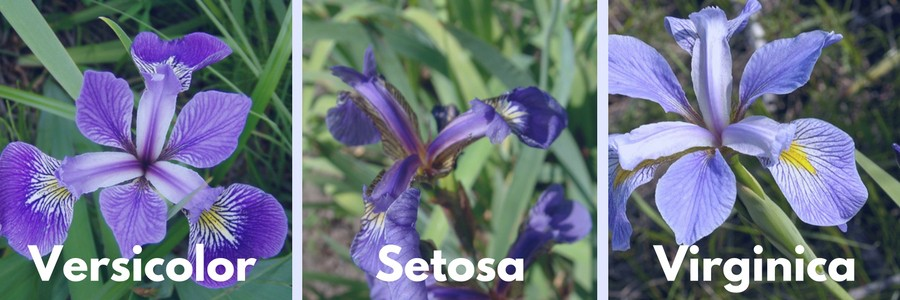

In [11]:
from IPython.display import Image
Image('https://pp.userapi.com/c853524/v853524724/6e4da/vduVoAF89Zg.jpg')

Проведем классификационный анализ всех выборок попарно с помощью параметра `hue`, где мы указываем наименование классов:

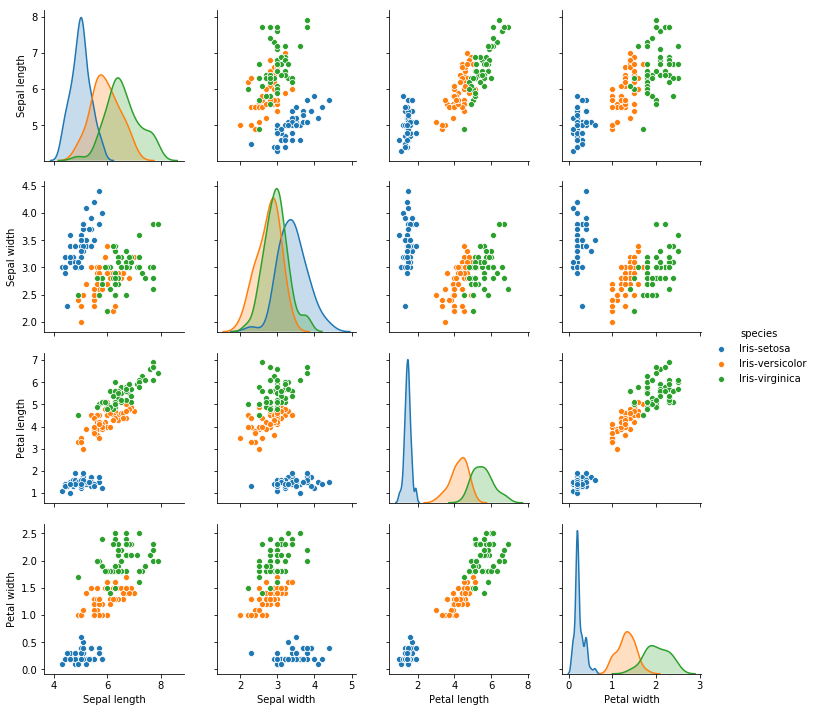

In [12]:
fig = sns.pairplot(data=data, hue='species')
plt.show()

## Практика работы с моделью

*Немного об обучении моделей*. В арсенале дата-саентиста кроме `pandas` и `matplotlib` должны быть библиотеки, позволяющие обучать модели. **Для простых моделей (линейные модели, решающее дерево, ...) отлично подходит `sklearn`**: в нем очень понятный и простой интерфейс. Несмотря на то, что в `sklearn` есть реализация бустинга и простых нейронных сетей, ими все же не пользуются и предпочитают специализированные библиотеки: `XGBoost`, `LightGBM` и пр. для градинетного бустинга над деревьями

Импортируем функцию, которая разделяет выборку на тренировочную и тестовую.

In [20]:
from sklearn.model_selection import train_test_split

Разделим нашу выборку.

In [21]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_iris, Y_iris, test_size=0.3)

**Импортируем алгоритм:**

In [22]:
from sklearn.neighbors import KNeighborsClassifier

Создаём модель. Здесь можно поиграться с количеством соседей.

In [23]:
model = KNeighborsClassifier(n_neighbors=5)

In [24]:
# study model

In [25]:
model.fit(Xtrain, Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
# import function for count accuracy 

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(model.predict(Xtest), Ytest)

0.9111111111111111

## Синтетический пример kNN:

In [31]:
def generateRandomCluster( xCenter, yCenter, pointsInCluster, sigma, clusterNumber ):
    """
    Функция формирует набор случайных pointsInCluster точек вокруг центра xCenter, yCenter со стандартным отклонением sigma.
    Для удобства сразу приписываем номер кластера clusterNumber
    
    Пример
    generateRandomCluster( 50, 50, 5, 1, 1 )
    
    [ (49.4383741073746, 50.759631072447775, 1),
     (50.382663637239496, 51.958511415275346, 1),
     (51.35861614413671, 50.14508008851586, 1),
     (49.99654565817289, 48.868625830102836, 1),
     (48.90429842105296, 50.30684883451077, 1) ]
    """
    
    clusterData = []
    for point in range( pointsInCluster ):
        clusterData.append( ( random.gauss( xCenter, sigma ), random.gauss( yCenter, sigma ), clusterNumber ) )
    
    return clusterData

In [32]:
def generateNClusters( clustersNumber, minCoordinate, maxLength, pointsInCluster, sigma ):
    """
    Функция генерит clustersNumber кластеров в пределах (x, y) координат от minCoordinate до minCoordinate + maxLength
    
    Пример
    generateNClusters( 3, 0, 100, 5, 1 )
    
    [
        [ (30.101595428493244, 97.81846577317793, 0),
          (30.982265309141784, 94.85561016707207, 0),
          (29.324361801401345, 96.13225349356063, 0),
          (28.55314432177591, 97.71789084567285, 0),
          (30.925804186398505, 97.73651238892455, 0)],
        [ (35.42172429469604, 62.868371107151994, 1),
          (36.36575870693403, 60.81612414265114, 1),
          (36.3958015730347, 60.845554677754464, 1),
          (35.29157575130411, 63.179905869433654, 1),
          (38.19703749175945, 61.839734328145795, 1)],
        [ (92.22845587073014, 40.18055397530009, 2),
          (90.7642755825596, 40.68519067128221, 2),
          (92.27913966714033, 39.604710170714505, 2),
          (93.57420210013105, 40.20564381974239, 2),
          (92.33724850339567, 40.261922276131735, 2)]
    ]
    """
    
    clustersData = []
    for cluster in range( clustersNumber ):
        clustersData.append( generateRandomCluster( minCoordinate + maxLength * random.random(), 
                                                    minCoordinate + maxLength * random.random(),
                                                    pointsInCluster,
                                                    sigma, cluster) )
    
    return clustersData

In [33]:
def drawClusters( clustersData ):
    """
    Функция рисует набор кластеров по данным clustersData
    """
    
    for cluster in clustersData:
        xData = []
        yData = []
        colors = []
        
        for point in cluster:
            xData.append( point[0] )
            yData.append( point[1] )
            colors.append( point[2] )
    
        plt.scatter( xData, yData, label = colors[0] )
        
    plt.legend( loc='upper right' )
    plt.show()

In [34]:
clustersNumber = 3
minCoordinate = 0
maxLength = 100
pointsInCluster = 15
sigma = 5

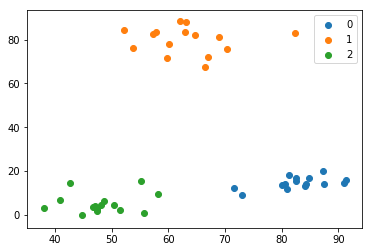

In [35]:
data = generateNClusters( clustersNumber, minCoordinate, maxLength, pointsInCluster, sigma )
drawClusters( data )

In [36]:
model = KNeighborsClassifier( n_neighbors = 3 )

In [37]:
X = []
Y = []

for cluster in data:
    for point in cluster:
        X.append( [ point[0], point[1] ] )
        Y.append( point[2] )

In [38]:
model.fit( X, Y )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [39]:
def KNeighbors( clustersData, model ):
    """
    Визуализация результатов классификации
    """
    step = 1
    xx, yy = np.meshgrid( np.arange( minCoordinate, minCoordinate + maxLength, step ),
                          np.arange( minCoordinate, minCoordinate + maxLength, step ) )
    
    Z = model.predict( np.c_[ xx.ravel(), yy.ravel() ] )
    Z = Z.reshape( xx.shape )
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
    
    for cluster in clustersData:
        xData = []
        yData = []
        colors = []
        
        for point in cluster:
            xData.append( point[0] )
            yData.append( point[1] )
            colors.append( point[2] )
    
        plt.scatter( xData, yData, label = colors[0] )
        
    plt.legend( loc='upper right' )
    
    plt.show()

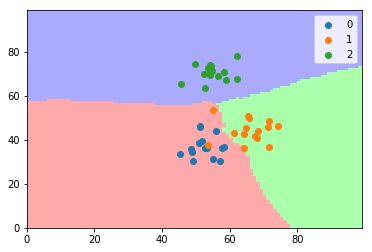

In [40]:
data = generateNClusters( clustersNumber, minCoordinate, maxLength, pointsInCluster, sigma )

X = []
Y = []

for cluster in data:
    for point in cluster:
        X.append( [ point[0], point[1] ] )
        Y.append( point[2] )

model.fit( X, Y )

KNeighbors( data, model )

**Здесь здорово заметны ошибки модели!!!**

Проверим точность:

In [42]:
accuracy_score(model.predict(X), Y)

0.9555555555555556

# Линейная регрессия

In [43]:
from sklearn import datasets, linear_model

In [44]:
# используем открытый датасет
diabetes = datasets.load_diabetes()

Посмотрим на данные:

In [45]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [74]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [75]:
# размер массива
diabetes.data.shape

(442, 10)

In [80]:
# признаки
feature_names = ['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6']

len(feature_names)

10

Для примера берем один признак, размерность массива увеличена при использовании константы `newaxis`:

In [66]:
x = diabetes.data[:, np.newaxis, 2]

In [68]:
x[:5]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469]])

In [69]:
y = diabetes.target

In [79]:
print(y[:5])
print(y.shape)

[151.  75. 141. 206. 135.]
(442,)


In [71]:
# строим модель
regr = linear_model.LinearRegression()
regr.fit( x, y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

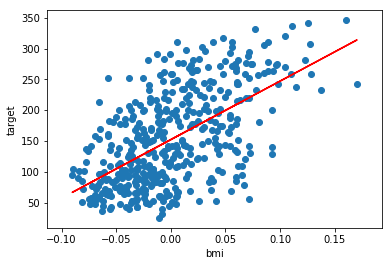

In [87]:
# график
plt.scatter( x, y )
plt.plot( x, regr.predict( x ), color = 'red')
plt.xlabel(feature_names[2])
plt.ylabel('target')
plt.show()

## Линейная регрессия, оценка недвижимости:

In [89]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [90]:
# корреляция:

corr = data.corr()
corr = corr.round(2)
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.06,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.06,-0.04,0.06,1,0.09,0.09,0.09,-0.1,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.1,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.01,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


Построим линейную регрессию от отдного параметра, наиболее сильно коррелирующего с ценами - LSTAT (уровень социального статуса населения в данном районе), корреляция с ценой на дом составляет -0.74.

Сперва разделим отсортируем все значения по LSTAT параметру:

In [93]:
data.sort_values(by=['LSTAT'], inplace=True)

X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
medv = data[['MEDV']]

разделим датасет на тренировочные и тестовые данные с помощью `test_size`(80% на 20%)


`random_state` - параметр который позволяет повторить результаты независимых исследовний (порядок смешивания данных)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    medv,
    test_size = 0.2,
    random_state = 42
)

Из полученных тренировочных и тестовых данных мы используем только один атрибут - LSTAT

In [95]:
X_train_lstat = X_train[['LSTAT']]
X_test_lstat = X_test[['LSTAT']]

Сделаем reshape(-1, 1) как того требует модель

In [97]:
X_train_lstat = np.array(X_train_lstat).reshape(-1, 1)
X_test_lstat = np.array(X_test_lstat).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [99]:
# учим

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_lstat, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Посмотрим точность модели:**

In [101]:
model.score(X_test_lstat, y_test)

0.6451627672291358

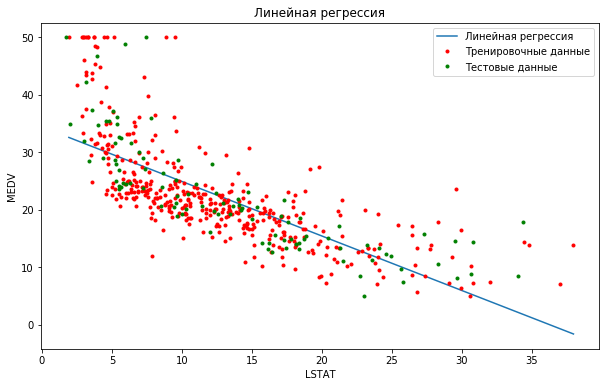

In [105]:
#увеличим дефолтный размер графиков
from pylab import rcParams
# rcParams - размер картинки
rcParams['figure.figsize'] = 10,6

# смотрим на графике
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Линейная регрессия')
x = np.linspace(min(X_train_lstat), max(X_train_lstat), 100)
y = (model.coef_*x + model.intercept_)
plt.plot(x,y)
plt.plot(X_train_lstat, y_train, 'r.')
plt.plot(X_test_lstat, y_test, 'g.')
plt.legend(['Линейная регрессия', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

### Пробуем предсказывать полиномиальной регрессией:

In [106]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train_lstat)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test_lstat), y_test)

0.7436157416297389

**полиномиальная регрессия 2-ой степени на 10% лучше предсказала стоимость недвижимости!**

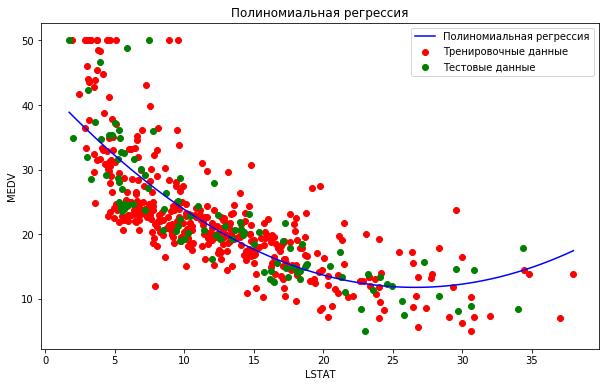

In [107]:
# график

def viz_polymonial():
    plt.scatter(X_train_lstat, y_train, c='red')
    plt.scatter(X_test_lstat, y_test, c='green')
    x = np.linspace(min(X_test_lstat), max(X_train_lstat), 100)
    y = pol_reg.predict(poly_reg.fit_transform(x))
    plt.plot(x, y, 'b')
    plt.title('Полиномиальная регрессия')
    plt.xlabel('LSTAT')
    plt.ylabel('MEDV')
    plt.legend(['Полиномиальная регрессия', 'Тренировочные данные', 'Тестовые данные'])
    plt.show()
    return
viz_polymonial()

**А если возьмем степень 4?**

In [108]:
poly_reg = PolynomialFeatures(degree=4)

X_poly = poly_reg.fit_transform(X_train_lstat)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test_lstat), y_test)

0.7115815138822869

### Качество упало, иногда сложность модели не гарантирует нам нужный результат! Лучше всегда проверять модель кросс-валидацией на предмет переобучения!

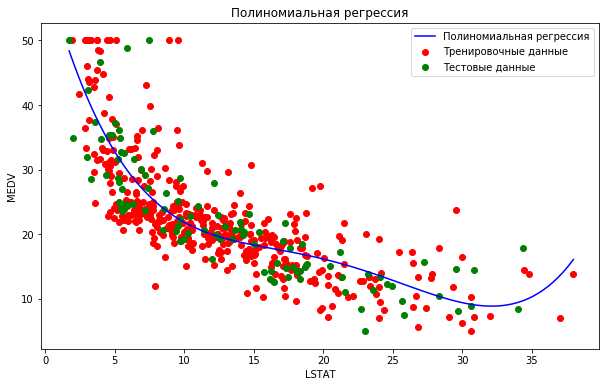

In [109]:
viz_polymonial()

# Кластеризация:
### разные алгоритмы справляются лучше с разными формами зависимостей:

In [110]:
HTML('<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">')

### PREPROCESSING

Все методы кластеризации основываются на метриках и потому крайне чувствительны к одному масштабу данных, поэтому:
    
### StandardScaler - must have